In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
path = '/content/gdrive/MyDrive/FARS2015NationalCSV/accident.csv'
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


# **Data Exploration and Analysis** 

Here we will analyze the data we have and try to draw some insights from them by graphs and plots. 

**Here we will focus on important factors which can be used to prevent future accidents** 

**The important factors we are going to focus are**

* Estimation of Accident details based on State
* Find out which state has more drunk drivers.
* On which type of weather most accidents took place.
* Manner of collision's lead to fatal accidents.
* How harmful surrounding environment's role had been?
* Accident's data related to Time, example (Month , Date etc..).




## **Estimation of Accident details based on State**

In [3]:
accident_data = pd.read_csv(path)
accident_data.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,34,-87,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,35,-87,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32,-86,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31,-86,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31,-86,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0


In [4]:
# Replacing the numbers in the data with State's Acronym

states_acro = {1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 
          6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 
          11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 
          16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 
          21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 
          25: 'MA', 26: 'MI', 27: 'MN', 
          28:'MS', 29: 'MO', 30: 'MT', 31: 'NE', 
          32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 
          36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 
          40: 'OK', 41: 'OR', 42: 'PN', 43: 'PR', 
          44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 
          48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 52: 'VI', 
          53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'}



### Which state has more number of accidents ? 

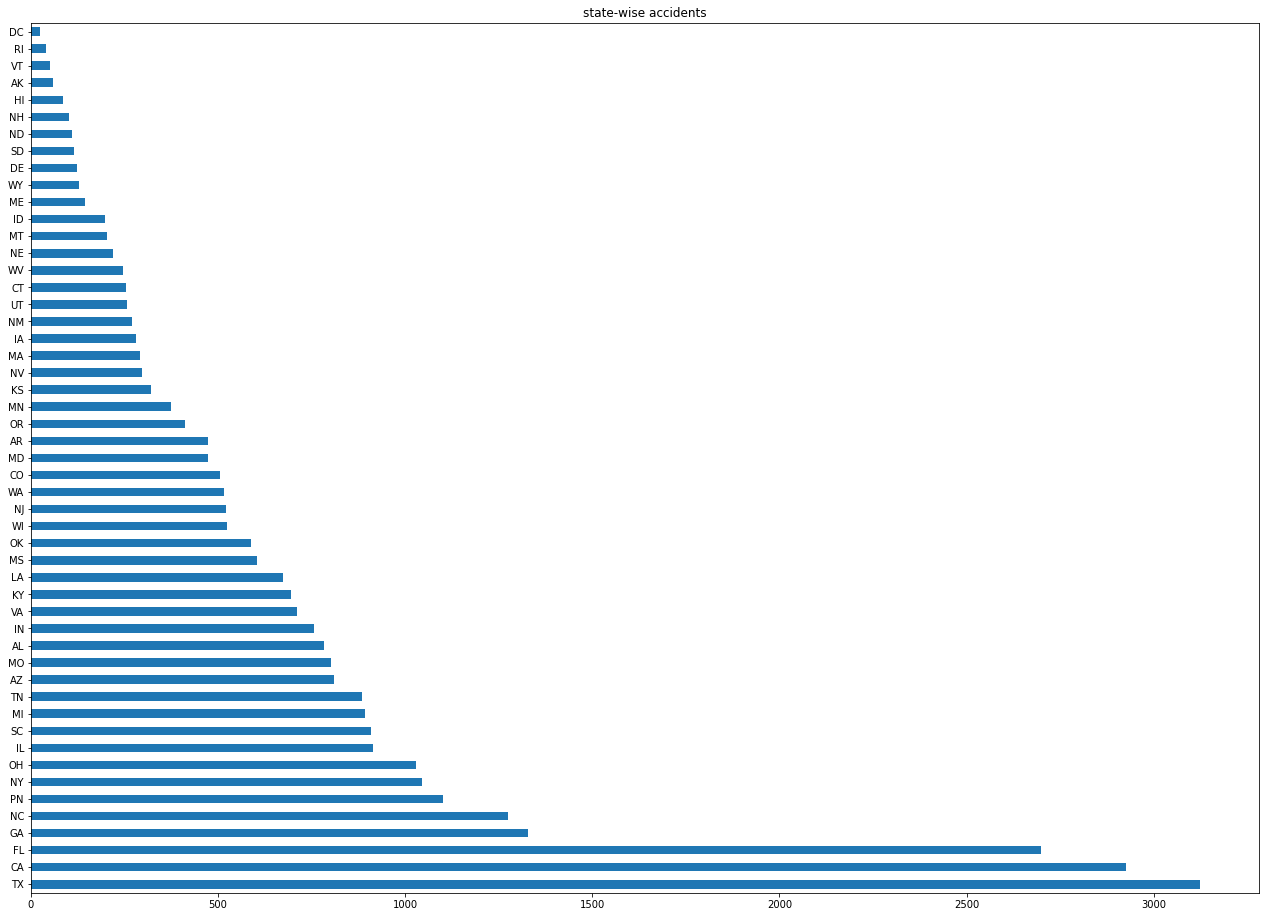

In [5]:
accident_data['state_acro']=accident_data['STATE'].apply(lambda x: states_acro[x])
Total_ac=accident_data['state_acro'].value_counts()
accident_data['state_acro'].value_counts().plot(kind='barh',title='state-wise accidents' , figsize = (22 , 16))

### Which state has most number of drunk drivers ? 

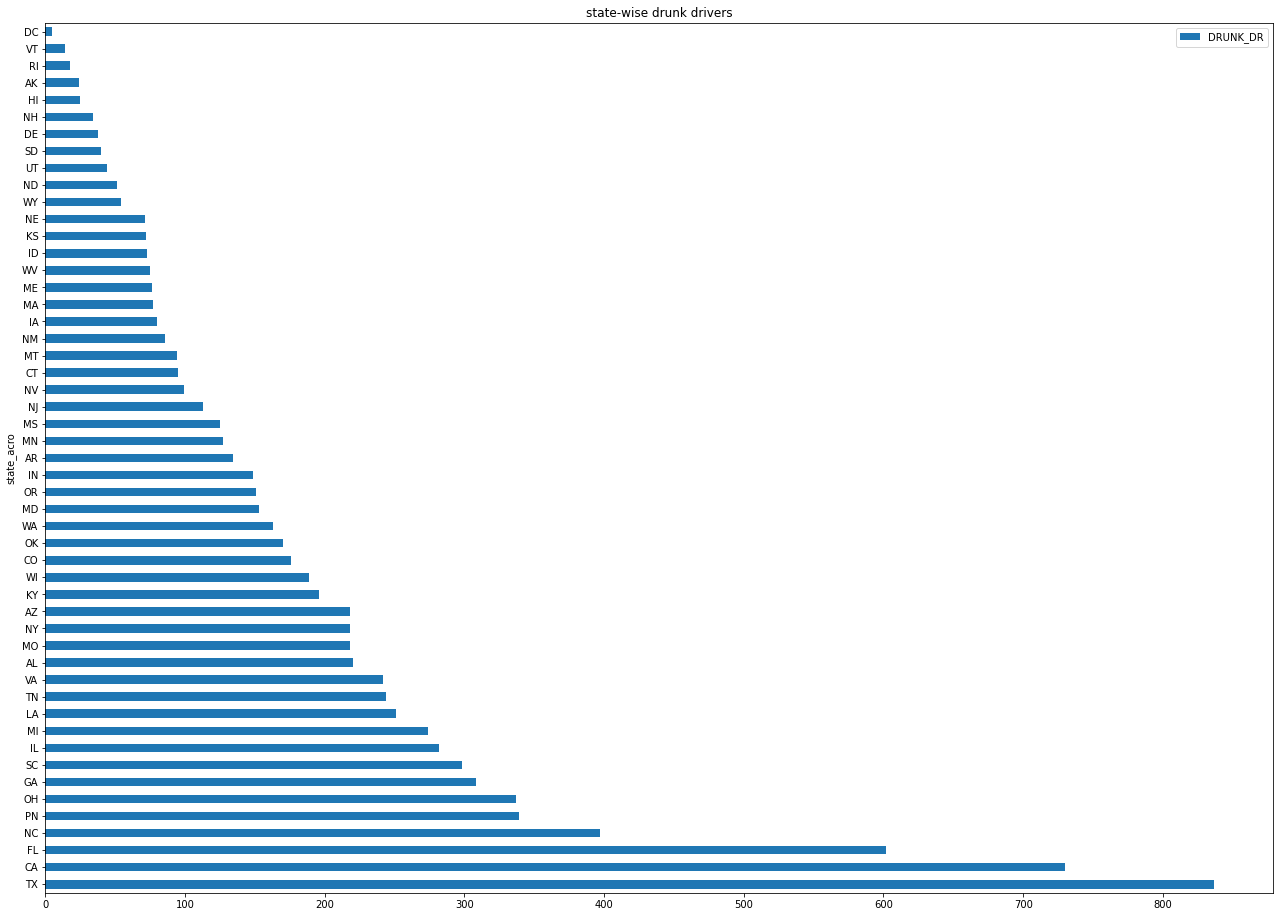

In [6]:
drunk_data=pd.concat([accident_data['state_acro'],accident_data['DRUNK_DR']],axis=1)
drunk_state=drunk_data.groupby('state_acro')
drunk_state.sum().sort_values(by='DRUNK_DR',ascending=False).plot(kind='barh',title='state-wise drunk drivers' , figsize = (22 , 16))


### Analyzing state with number of drunk and non-drunk drivers 

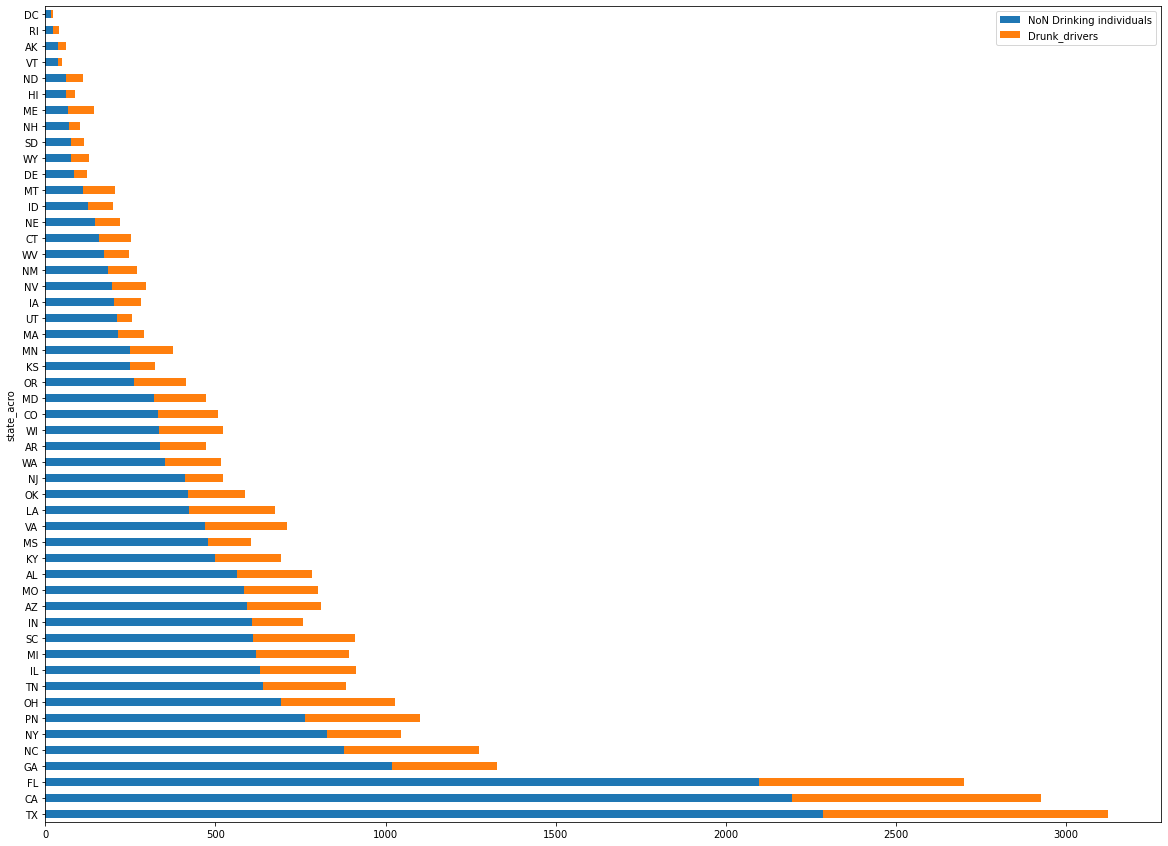

In [7]:
Total_ac.sort_index(ascending=True)
drunk_break=pd.concat([Total_ac.sort_index(ascending=True),drunk_state.sum()],axis=1)
drunk_break.columns=['People_involved','Drunk_drivers']
drunk_break['NoN Drinking individuals']= drunk_break['People_involved']-drunk_break['Drunk_drivers']
drunk_break[['NoN Drinking individuals','Drunk_drivers']].sort_values(
    by='NoN Drinking individuals',ascending=False).plot.barh(stacked='True' , figsize = (20 , 15))

### Estimating the Drunk drivers per population of the state

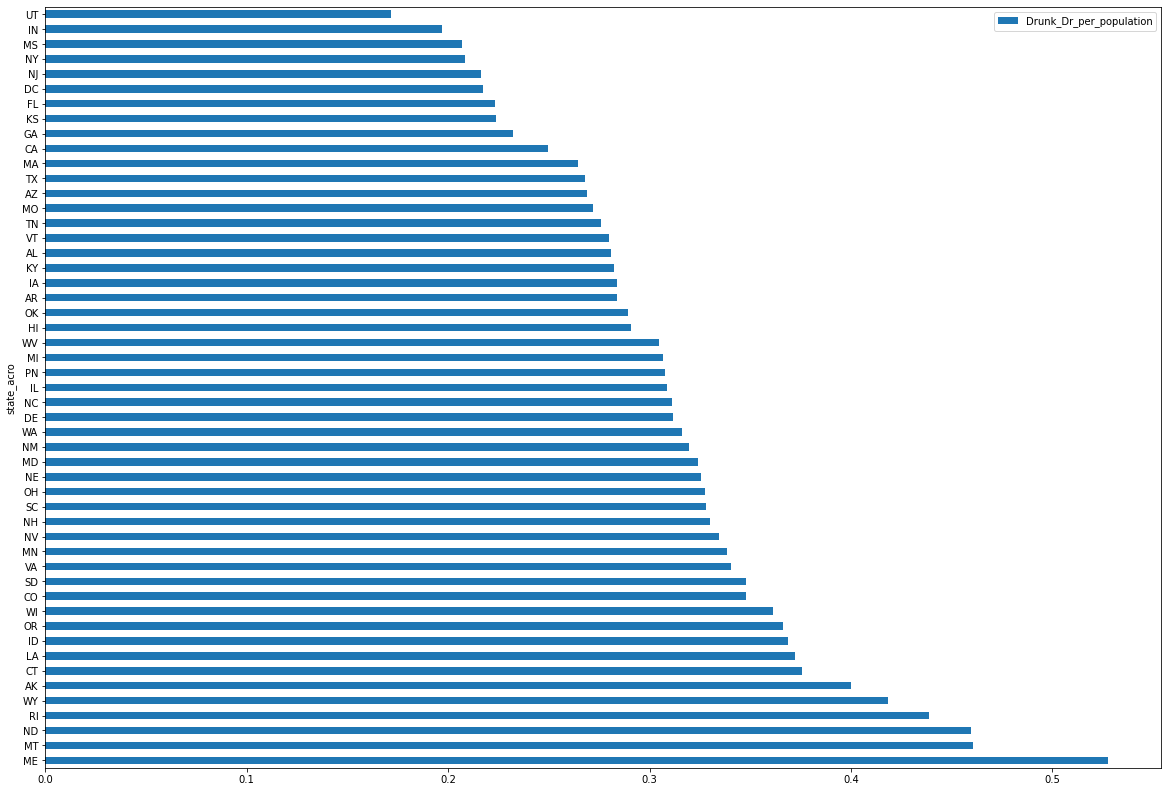

In [8]:
drunk_break['Drunk_Dr_per_population']= drunk_break['Drunk_drivers']/drunk_break['People_involved']
drunk_break.head()
drunk_break[['Drunk_Dr_per_population']].sort_values(by='Drunk_Dr_per_population',ascending=False).plot(kind='barh' , figsize = (20 , 14))

## **Find out which state has more drunk drivers**

From the collective states, we will make some analysis and find out which state has more drunk drivers

In [9]:
# Making a copy of our dataframe 

accident_drunk = accident_data.copy()
accident_drunk.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,state_acro
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,34,-87,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1,AL
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,35,-87,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0,AL
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32,-86,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1,AL
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31,-86,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1,AL
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31,-86,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0,AL


In [10]:
# Below is the dictionary of State 

states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 
          6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 
          11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
          16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
          25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
          28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 
          32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 
          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 
          40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 
          44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 
          48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 
          53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

In [11]:
# Creating another column where the mapping for the state  
accident_drunk['state']=accident_drunk['STATE'].apply(lambda x:states[x])
accident_drunk['state']

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
32161    Wyoming
32162    Wyoming
32163    Wyoming
32164    Wyoming
32165    Wyoming
Name: state, Length: 32166, dtype: object

In [12]:
# Grouping by only the drunk driver's with respect to the states
drunkdf =accident_drunk.groupby(['state']).agg({'DRUNK_DR':sum})

# Below dataframe has the sum of drunk driver's in each state
drunkdf , type(drunkdf)

(                      DRUNK_DR
 state                         
 Alabama                    220
 Alaska                      24
 Arizona                    218
 Arkansas                   134
 California                 730
 Colorado                   176
 Connecticut                 95
 Delaware                    38
 District of Columbia         5
 Florida                    602
 Georgia                    308
 Hawaii                      25
 Idaho                       73
 Illinois                   282
 Indiana                    149
 Iowa                        80
 Kansas                      72
 Kentucky                   196
 Louisiana                  251
 Maine                       76
 Maryland                   153
 Massachusetts               77
 Michigan                   274
 Minnesota                  127
 Mississippi                125
 Missouri                   218
 Montana                     94
 Nebraska                    71
 Nevada                      99
 New Ham

In [13]:
# Total counts of the state and converting to dataframe

totalcount = accident_drunk['state'].value_counts().to_frame()
totalcount

,state
Texas,3124
California,2925
Florida,2699
Georgia,1327
North Carolina,1275
Pennsylvania,1102
New York,1046
Ohio,1029
Illinois,914
South Carolina,909


In [14]:
# From the new totalcount df , we derive the drunk driver per in the whole state

drunkdf['total']=totalcount['state'] # adding this to drunk dataframe
drunkdf['per']=drunkdf['DRUNK_DR']/drunkdf['total'] # calculating per captia
drunkdf['per']=drunkdf['per']*100
drunkdf=drunkdf.sort_values(by='per' , ascending=False) # Sort by the percentage 
print(drunkdf.head()) # Percentage of drunk drivers in the state 

              DRUNK_DR  total        per
state                                   
Maine               76    144  52.777778
Montana             94    204  46.078431
North Dakota        51    111  45.945946
Rhode Island        18     41  43.902439
Wyoming             54    129  41.860465


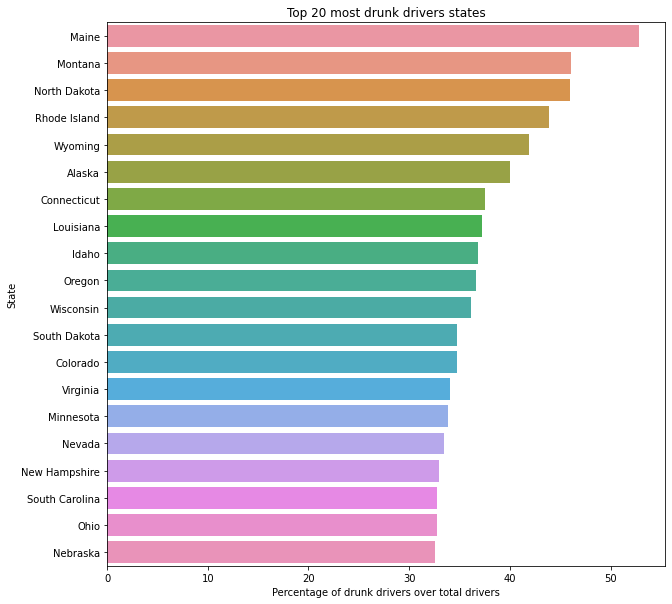

In [15]:
# Plotting the data to estimate Top 20 

drunkdf=drunkdf.head(20)
fig , ax = plt.subplots(figsize = (10 , 10))
sns.barplot(x=drunkdf.per,y=drunkdf.index , orient='h')
ax.set(
    xlabel = 'Percentage of drunk drivers over total drivers' , 
    ylabel = 'State'
)
plt.title('Top 20 most drunk drivers states')
plt.show()


**Maine has more drunk drivers than other state**

## **On which type of weather most accidents took place**

From the given data, we will find at which type of weather most accidents took place.

In [16]:
# Reading the data in 

accident_weather = pd.read_csv(path)
accident_weather['WEATHER'].value_counts()

1     22904
10     5481
2      2464
5       402
4       318
99      255
3       100
98      100
8        59
12       24
11       23
6        23
7        13
Name: WEATHER, dtype: int64

In [17]:
# Dictionary which has coded values 

weather = {1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',
           99:'unknown',3:'sleet',98:'unreported',8:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}

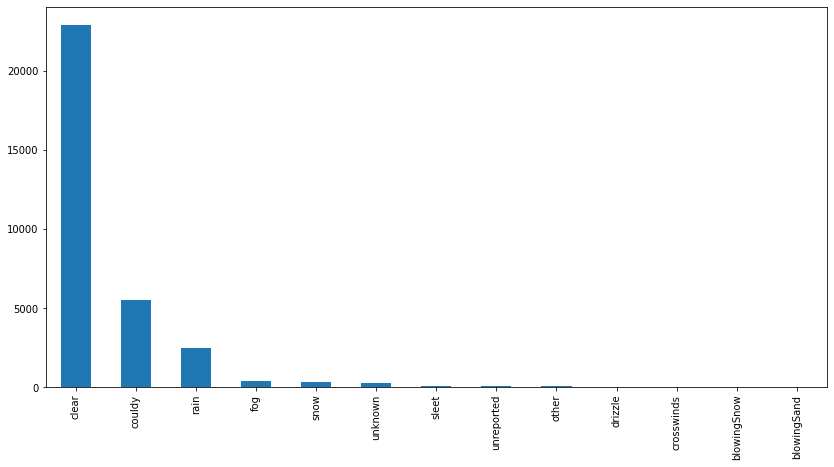

In [18]:
# Plotting the data

accident_weather['weather'] = accident_weather['WEATHER'].apply( lambda x:weather[x] )
accident_weather['weather'].value_counts().plot.bar(figsize = (14 , 7))

## **Manner of collision's lead to fatal accidents**

From the given data, here we will find which manner or collision (ex : head to head or etc..) lead to death in the accidents.

In [19]:
accident_weather['MAN_COLL'].value_counts()

0     19881
6      5778
2      3278
1      2203
7       501
8       324
11       79
99       62
9        38
98       21
10        1
Name: MAN_COLL, dtype: int64

In [20]:
# Dictionary which has the right value, replacing it with numbers

man_coll = {0:'NoCol',6:'angle',2:'headOn',1:'Rear',7:'sideswipe'}

In [21]:
# Applying the above dictionary converting the values

accident_weather['man_coll'] = accident_weather['MAN_COLL'].apply(lambda x:man_coll[x] if (x== 0 or x==6 or x==2 or x==1 or x==7) else 'NoCol')


In [22]:
# Checking if there abnormal value exists

accident_weather['man_coll'].unique()

array(['NoCol', 'angle', 'headOn', 'sideswipe', 'Rear'], dtype=object)

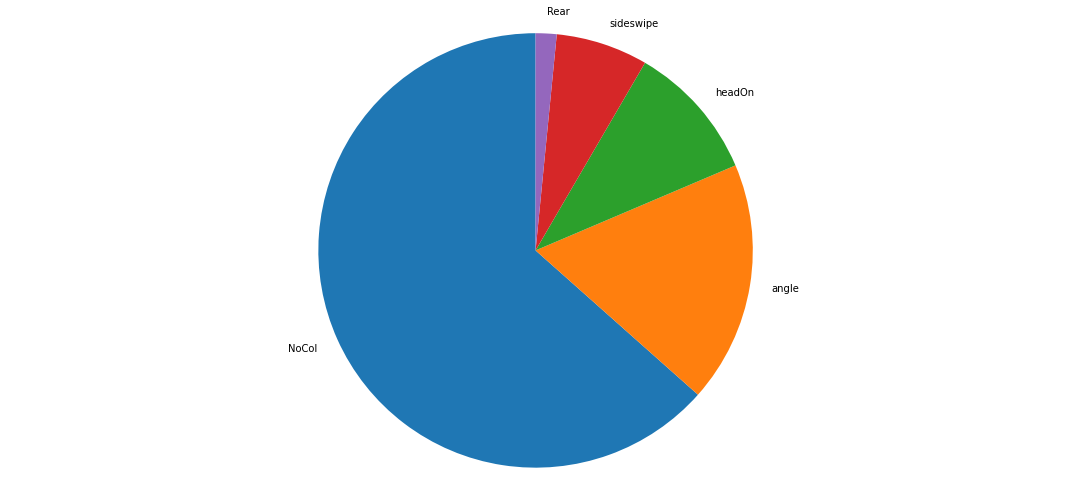

In [23]:
# Plotting a Pie chart for visualizing 

fig1, ax1 = plt.subplots(figsize = (15 , 7))
labels = accident_weather['man_coll'].unique()
ax1.pie(accident_weather['man_coll'].value_counts(),  labels=labels, 
        startangle=90 )

ax1.axis('equal')  
plt.tight_layout()
plt.show()


## **How harmful surrounding environment's role had been ?** 

In [24]:
accident_weather['HARM_EV'].value_counts().head()

12    12239
8      4981
1      2823
42     2298
33     1091
Name: HARM_EV, dtype: int64

In [25]:
# Replacing numbers with real values 

harm_ev= {12: 'SameRoadVehicle', 8: 'Pedestrian', 1: 'OverTurn', 42: 'Trees', 
          33: 'Curb', 34: 'Ditch', 35: 'Embankment'}

In [26]:
# Encoding the values 
accident_weather['harm_env'] = accident_weather['HARM_EV'].apply(lambda x:harm_ev[x] 
                                                                if(x==12 or x==8 or x==1 or x==42 or x==33 or x==34 or x== 35)  else 'Other' )

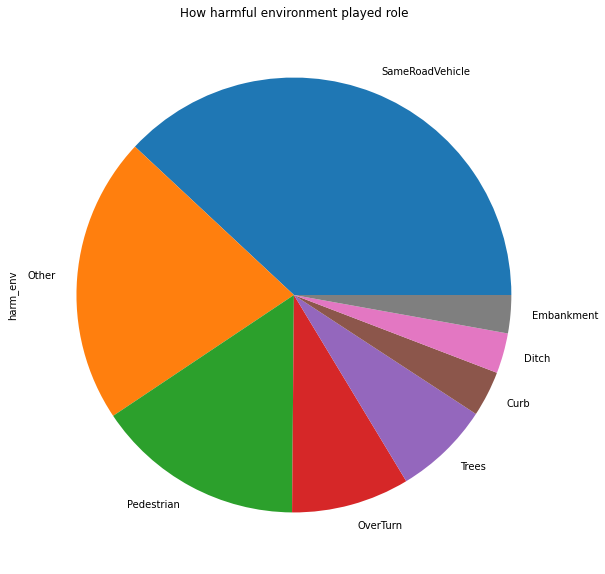

In [27]:
# Plotting the data in Pie Chart for visualization

accident_weather['harm_env'].value_counts().plot(kind='pie',title='How harmful environment played role' , figsize = (18 , 10))

## **Accident's data related to Time, example (Month , Date etc..)**

### Month-wise data 

On which month most accidents took place ? 

In [28]:
# Reading the data

accident_data_month = pd.read_csv(path)
accident_data_month.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,34,-87,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,35,-87,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32,-86,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31,-86,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31,-86,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0


In [29]:
# Replacing numbers with name of month 
month = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 
          5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
          9: 'Sep', 10: 'Oct',11: 'Nov',12: 'Dec'}


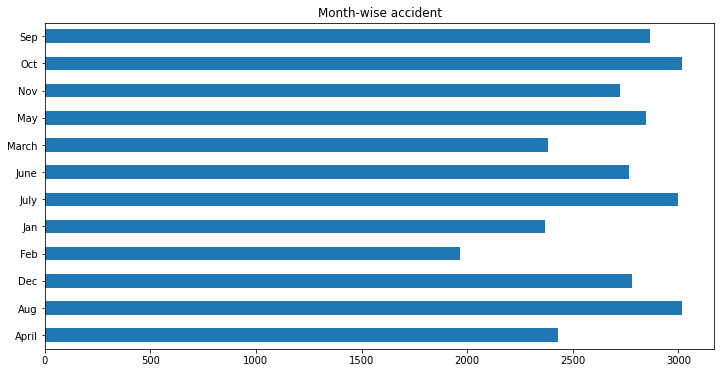

In [30]:
# Plotting a horizantal bar plot for visualizing month wise accident

accident_data_month['month']=accident_data_month['MONTH'].apply(lambda x: month[x])
accident_data_month['month'].value_counts().sort_index(level='month').plot(kind='barh',title='Month-wise accident' , figsize = (12 , 6))


### Date-wise breakdown 

On which spread of date's most number of accidents took place

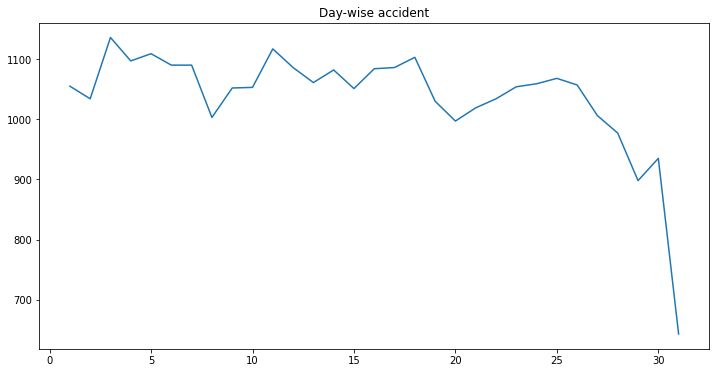

In [31]:
accident_data_month['DAY'].value_counts().sort_index().plot(title='Day-wise accident' , figsize = (12 , 6))


### Weekday break-down

On which day most accident's had occured 


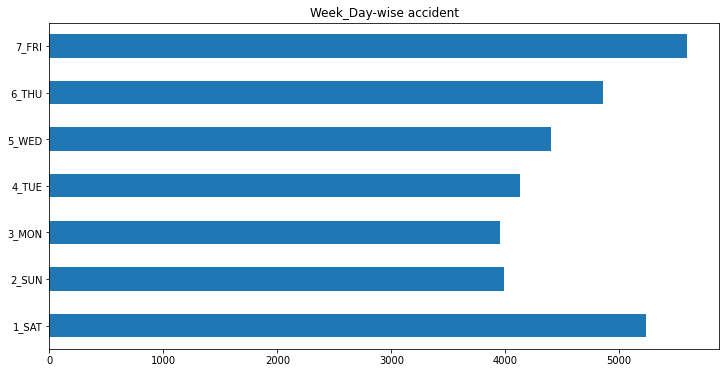

In [32]:
# Replacing numbers with days 
day = {1: '1_SAT', 2: '2_SUN', 3: '3_MON', 4: '4_TUE', 
          5: '5_WED', 6: '6_THU', 7: '7_FRI'}

# Encoding 
accident_data_month['day_week']=accident_data_month['DAY_WEEK'].apply(lambda x: day[x])

# Plotting the data
accident_data_month['day_week'].value_counts().sort_index().plot(kind='barh',title='Week_Day-wise accident' , figsize = (12 , 6))


### Hourly Breakdown 

Which hour of the time most number of accidents took place ? 

`For example , at 2 most accidents took place`

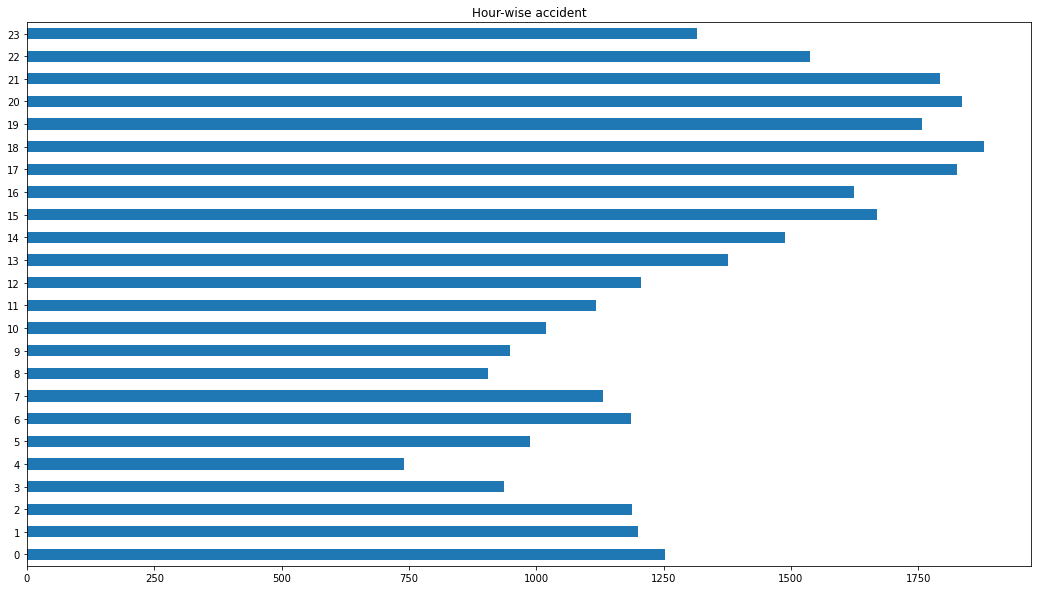

In [33]:
accident_data_month=accident_data_month[accident_data_month.HOUR != 99]

accident_data_month['HOUR'].value_counts().sort_index().plot(kind='barh',title='Hour-wise accident' , figsize = (18 , 10))

## **Feature Engineering** 


Here we will create new columns and play with data, which will be used in modelling and for analysis purpose. 

Create new columns by combining already existing columns.

In [34]:
# Creating another column where the mapping for the state has done 
accident_weather['state']=accident_weather['STATE'].apply(lambda x:states[x])
accident_weather['state']

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
32161    Wyoming
32162    Wyoming
32163    Wyoming
32164    Wyoming
32165    Wyoming
Name: state, Length: 32166, dtype: object

In [35]:
# Choosing the data to be modeled

model_data = accident_weather[['state' , 'MONTH' , 'DAY_WEEK' , 'DAY' , 'HOUR' , 
                      'harm_env', 'DRUNK_DR' , 'weather' , 'man_coll']]



In [36]:
# Looking into the new model data 

model_data.head()


,state,MONTH,DAY_WEEK,DAY,HOUR,harm_env,DRUNK_DR,weather,man_coll
0,Alabama,1,5,1,2,Embankment,1,clear,NoCol
1,Alabama,1,5,1,22,Ditch,0,couldy,NoCol
2,Alabama,1,5,1,1,Trees,1,clear,NoCol
3,Alabama,1,1,4,0,Other,1,couldy,NoCol
4,Alabama,1,4,7,7,SameRoadVehicle,0,clear,angle


In [37]:
# Checking if there is any missing values

model_data.isna().sum()

state       0
MONTH       0
DAY_WEEK    0
DAY         0
HOUR        0
harm_env    0
DRUNK_DR    0
weather     0
man_coll    0
dtype: int64

Certain **odd values** should be replaced with normal values to prevent outliers in the data. By doing this our data will be somewhat good for modelling. 

### Below, we are filling some value to remove the oddness in the data

As per the instruction given by the research paper, we have to get rid of these value and replace with value's they had mentioned in the rule book of this dataset.

In [38]:
# Filling is been done here! 

model_data['state']=model_data['state'].fillna('TX')
model_data['MONTH']=model_data['MONTH'].fillna(0)
model_data['DAY_WEEK']=model_data['DAY_WEEK'].fillna(6)
model_data['DAY']=model_data['DAY'].fillna(3)
model_data['HOUR']=model_data['HOUR'].fillna(18)
model_data['harm_env']=model_data['harm_env'].fillna('Embankment')
model_data['DRUNK_DR']=model_data['DRUNK_DR'].fillna(0)
model_data['harm_env'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

array(['Embankment', 'Ditch', 'Trees', 'Other', 'SameRoadVehicle',
       'OverTurn', 'Pedestrian', 'Curb'], dtype=object)

In [39]:
model_data.head()

,state,MONTH,DAY_WEEK,DAY,HOUR,harm_env,DRUNK_DR,weather,man_coll
0,Alabama,1,5,1,2,Embankment,1,clear,NoCol
1,Alabama,1,5,1,22,Ditch,0,couldy,NoCol
2,Alabama,1,5,1,1,Trees,1,clear,NoCol
3,Alabama,1,1,4,0,Other,1,couldy,NoCol
4,Alabama,1,4,7,7,SameRoadVehicle,0,clear,angle


In [40]:
# Replace Embankment', 'SameRoadVehicle' with EM and SRV respectively

model_data['harm_env'] = model_data['harm_env'].replace(['Embankment', 'SameRoadVehicle'], ['EM', 'SRV'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Converting categorical into numerical variables for all string columns

# For harmful environment column
x=pd.get_dummies(model_data['harm_env'], prefix = 'harm_env')

# For state column
x = pd.concat([x, pd.get_dummies(model_data['state'], prefix ='state')], axis=1)

# For Month column
x = pd.concat([x, pd.get_dummies(model_data['MONTH'], prefix ='MONTH')], axis=1)

# For Day Week column
x = pd.concat([x, pd.get_dummies(model_data['DAY_WEEK'], prefix ='Dw')], axis=1)

# For Day column
x = pd.concat([x, pd.get_dummies(model_data['DAY'], prefix ='DAY')], axis=1)

# For Hour Column
x = pd.concat([x, pd.get_dummies(model_data['HOUR'], prefix ='HOUR')], axis=1)

# For Collision column 
x = pd.concat([x, pd.get_dummies(model_data['man_coll'], prefix ='man_coll')], axis=1)

# For weather column
x = pd.concat([x, pd.get_dummies(model_data['weather'], prefix ='weather')], axis=1)



# Checking after all sorts of transformation
x.head()


,harm_env_Curb,harm_env_Ditch,harm_env_EM,harm_env_Other,harm_env_OverTurn,harm_env_Pedestrian,harm_env_SRV,harm_env_Trees,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,...,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,HOUR_99,man_coll_NoCol,man_coll_Rear,man_coll_angle,man_coll_headOn,man_coll_sideswipe,weather_blowingSand,weather_blowingSnow,weather_clear,weather_couldy,weather_crosswinds,weather_drizzle,weather_fog,weather_other,weather_rain,weather_sleet,weather_snow,weather_unknown,weather_unreported
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Our number of columns will be more now. It's because for every categorical (or) string variable columns, we convert them into numerical based on (0 or 1) format. So now its a numerical column

**Machine Learning Model only can train with NUMERICAL VALUES**

In [42]:
# Checking if the values 0 or 1 are there , only getting 1 - Yes , 0 - No values

model_data['DRUNK_DR'] = model_data['DRUNK_DR'].apply(lambda x: 0 if (x==0)  else 1)
model_data['DRUNK_DR'].value_counts()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    23310
1     8856
Name: DRUNK_DR, dtype: int64

## Modelling

It's the Machine Learning part, where we will put an end for analysis and get our data to prepare for Predictive Analysis. 

We will build a model now which can be used in future to predict **Whether the person who made the accident is drunken or sober**

This can be used on data which has similar format or patterns like this data, our model can able to predict that particular person is drunken or not by using the data given

In [43]:
# Importing the packages needed , here we are using DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [44]:
# Label encoder for encoding the target labels 
lab_enc  = preprocessing.LabelEncoder()

# Fitting the label encoder into the target variables 
y = lab_enc.fit_transform(model_data['DRUNK_DR'])

# Checking the numpy array , from numerical we converted into numpy array.
y

array([1, 0, 1, ..., 0, 0, 0])

Here we are using Decision Tree Classifier to find out **Is the driver Drunk or Sober or not drunk**

In [45]:
# Instantiating the model
clf = DecisionTreeClassifier(max_depth=4)

# Fitting the model to the data
clf.fit(x.values , y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
# Splitting our data into X and Y 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 )

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((25732, 152), (6434, 152), (25732,), (6434,))

In [47]:
# Fitting the model again in the train split 

clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
# Getting the score in the test set 

clf.score(X_test , y_test)

0.7429281939695368

### Fitting the model in different models and observing the results 

We already tested our data on Decision Tree Classifier, which gave us accuracy of **74%**. 

But out of curiosity let's fit our data into other similar classifier's (or) models and find out what **accuracy** those models can bring to us.

In [49]:
# Packages needed to import 

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
# Below we are instantating the models we are going to use and compare 

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]


classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                      weights='uniform'),
 SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False

In [51]:
# Logging these scores and losses for our observation

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("#"*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("#"*30)

##############################
KNeighborsClassifier
****Results****
Accuracy: 69.1172%
Log Loss: 3.8387908150697188
##############################
SVC
****Results****
Accuracy: 72.1169%
Log Loss: 0.5129635935950154
##############################
RandomForestClassifier
****Results****
Accuracy: 75.4119%
Log Loss: 0.5203254538267872
##############################
AdaBoostClassifier
****Results****
Accuracy: 76.4998%
Log Loss: 0.6827108613866437
##############################
GradientBoostingClassifier
****Results****
Accuracy: 76.0025%
Log Loss: 0.4872837131361681
##############################
GaussianNB
****Results****
Accuracy: 69.4125%
Log Loss: 3.777881436573169
##############################
LinearDiscriminantAnalysis
****Results****
Accuracy: 76.8262%
Log Loss: 0.47855481997608795
##############################


#### Below we are observing the model's performance and loss by plotting them in graph for better visualization

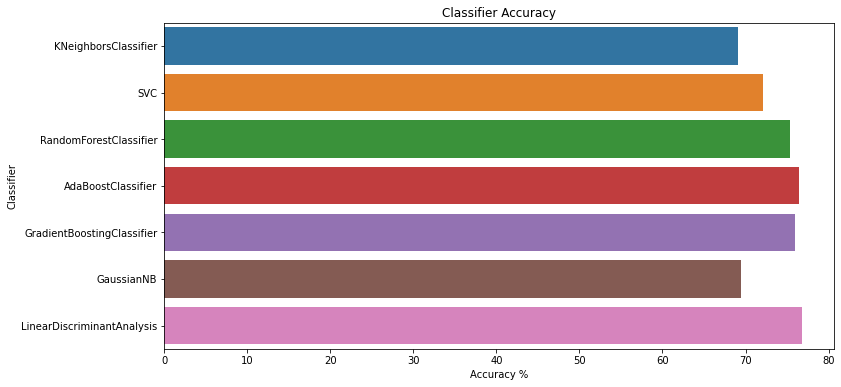

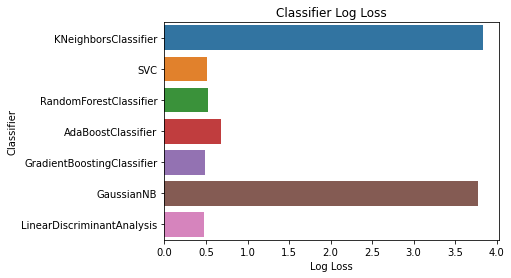

In [52]:
# Setting up the figsize here 
fig , ax = plt.subplots(figsize = (12 , 6))

sns.barplot(x='Accuracy', y='Classifier', data=log , ax=ax)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.barplot(x='Log Loss', y='Classifier', data=log)

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()